# Audio files to spectrograms transformation


In [1]:
import pandas as pd
import numpy as np
import scipy

from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
import random
import librosa
import matplotlib.image

### Loading data

In [2]:
train_list = pd.read_csv("final_train_list.txt", index_col = 0).iloc[:,0].values.tolist()
test_list = pd.read_csv("final_test_list.txt", index_col = 0).iloc[:,0].values.tolist()

In [3]:
train_list[0:4]

['audio/down/881583a6_nohash_0.wav',
 'audio/right/cd85758f_nohash_2.wav',
 'audio/left/7be5a0f3_nohash_0.wav',
 'audio/stop/c22d3f18_nohash_0.wav']

### Spectrograms

In [4]:
!mkdir spectrograms2
!mkdir spectrograms2\yes
!mkdir spectrograms2\no
!mkdir spectrograms2\up
!mkdir spectrograms2\down
!mkdir spectrograms2\left
!mkdir spectrograms2\right
!mkdir spectrograms2\on
!mkdir spectrograms2\off
!mkdir spectrograms2\stop
!mkdir spectrograms2\go

In [5]:
import warnings
warnings.simplefilter('ignore')

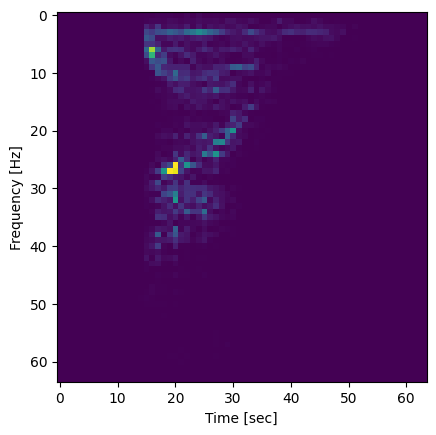

In [6]:
path = test_list[14]

sample_rate, samples = wavfile.read(path)
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.imshow(spectrogram[0:64, 0:64])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.legend(loc="upper right")
plt.show()

### TESTING AUDIO FILES - time stretching ---- and transformation to spectrograms 64 x 64

In [31]:
# TIME STRETCHING OF ALL AUDIO FILES TO 64 s, saving spectrorams as 64 x 64 files 
# - frequency is also reduced to significant values comprised within 64 pixels

REFERENCE_LENGTH = 14550.0

count = 0
for path in test_list:
    # loading audio file
    song, fs = librosa.load(path)
    
    # stretching to Time duration equivalent to 64 pixels
    song_stretched = librosa.effects.time_stretch(song, song.shape[0]/REFERENCE_LENGTH)
    frequencies, times, spectrogram = signal.spectrogram(song_stretched, fs)
    
    # spectorgram path
    arr = path.split("/")
    spectrogram_path = "spectrograms2/" + arr[1] + "/" + arr[2][:-4] + ".png"
    
    # scaling spectrograms to 64 x 64 pixels & 0 - 255 integers
    spectrogram = spectrogram[0:64, 0:64]
    
    #print(spectrogram)
    
    # logarithmic scaling
    spectrogram = np.log(spectrogram)
    
    spectrogram = (np.round((spectrogram - spectrogram.min())/(spectrogram.max()/255.0))).astype(np.uint8)
    #print(spectrogram)
    #print(spectrogram.mean())
    #break
    
    # saving spectrogram
    matplotlib.image.imsave(spectrogram_path, spectrogram)


### TRAINING AUDIO FILES - time stretching ---- and transformation to spectrograms 64 x 64

In [32]:
# TIME STRETCHING OF ALL AUDIO FILES TO 64 s, saving spectrorams as 64 x 64 files 
# - frequency is also reduced to significant values comprised within 64 pixels

REFERENCE_LENGTH = 14550.0

for path in train_list:
    # loading audio file
    song, fs = librosa.load(path)
    
    # stretching to Time duration equivalent to 64 pixels
    song_stretched = librosa.effects.time_stretch(song, song.shape[0]/REFERENCE_LENGTH)
    frequencies, times, spectrogram = signal.spectrogram(song_stretched, fs)
    
    # spectorgram path
    arr = path.split("/")
    spectrogram_path = "spectrograms2/" + arr[1] + "/" + arr[2][:-4] + ".png"
    
    # scaling spectrograms to 64 x 64 pixels & 0 - 255 integers
    spectrogram = spectrogram[0:64, 0:64]
    
        
    # logarithmic scaling
    spectrogram = np.log(spectrogram)
    
    spectrogram = (np.round((spectrogram - spectrogram.min())/(spectrogram.max()/255.0))).astype(np.uint8)
    
    # saving spectrogram
    matplotlib.image.imsave(spectrogram_path, spectrogram)


### Saving lists to read spectrograms

In [33]:
spectr_test_list = []

for el in test_list:
    arr = el.split("/")
    spectrogram_path = "spectrograms2/" + arr[1] + "/" + arr[2][:-4] + ".png"
    spectr_test_list.append(spectrogram_path)

spectr_train_list = []

for el in train_list:
    arr = el.split("/")
    spectrogram_path = "spectrograms2/" + arr[1] + "/" + arr[2][:-4] + ".png"
    spectr_train_list.append(spectrogram_path)


In [34]:
spectr_train_list[14]

'spectrograms2/off/6b81fead_nohash_0.png'

In [35]:

pd.DataFrame(spectr_train_list).to_csv("spectr2_train_list.txt")
    
pd.DataFrame(spectr_test_list).to_csv("spectr2_test_list.txt")

In [36]:
spectr_train_list = pd.read_csv("spectr2_train_list.txt", index_col = 0).iloc[:,0].values.tolist()
spectr_test_list = pd.read_csv("spectr2_test_list.txt", index_col = 0).iloc[:,0].values.tolist()

### Other - not used

In [69]:
s = []
s2 = []
for path in test_list:
    sample_rate, samples = wavfile.read(path)
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
    s.append(spectrogram.shape[0])
    s2.append(spectrogram.shape[1])

In [74]:
np.unique(s)


array([129])

In [73]:
np.unique(s2)

array([98])